In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [6]:
import yfinance as yf

In [7]:
df=yf.download('BTC-USD',start='2017-01-01',end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [8]:
print(df)

                    Open          High           Low         Close  \
Date                                                                 
2017-01-01    963.658020   1003.080017    958.698975    998.325012   
2017-01-02    998.617004   1031.390015    996.702026   1021.750000   
2017-01-03   1021.599976   1044.079956   1021.599976   1043.839966   
2017-01-04   1044.400024   1159.420044   1044.400024   1154.729980   
2017-01-05   1156.729980   1191.099976    910.416992   1013.380005   
...                  ...           ...           ...           ...   
2023-12-26  43599.847656  43603.175781  41676.488281  42520.402344   
2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469   
2023-12-28  43468.199219  43804.781250  42318.550781  42627.855469   
2023-12-29  42614.644531  43124.324219  41424.062500  42099.402344   
2023-12-30  42091.753906  42584.125000  41556.226562  42156.902344   

               Adj Close       Volume  
Date                                   
2017-01-0

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945


In [11]:
df.shape

(2555, 6)

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03
mean,19199.725480,19649.644815,18714.869120,19214.107445,19214.107445,2.195224e+10
std,16141.674302,16531.333535,15699.481255,16140.563247,16140.563247,1.911461e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,6791.744873,6946.554443,6653.395020,6791.979736,6791.979736,6.530925e+09
50%,11349.740234,11569.914062,11012.415039,11358.101562,11358.101562,1.881609e+10
75%,29355.446289,29901.055664,28961.661133,29365.535156,29365.535156,3.160210e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [14]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
df['Price_Change']=df['Close'].pct_change()
df['7_Day_MA']=df['Close'].rolling(window=7).mean()
df['14_Day_MA']=df['Close'].rolling(window=14).mean()
df['30_Day_MA']=df['Close'].rolling(window=30).mean()
df['Volatility']=df['High']-df['Low']
df=df.dropna()

In [19]:
x=df[['Price_Change','7_Day_MA','14_Day_MA','30_Day_MA','Volatility']]
y=df['Close']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred=model.predict(x_test)

In [27]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 526.3221487113138
R2 Score: 0.9963609016598475


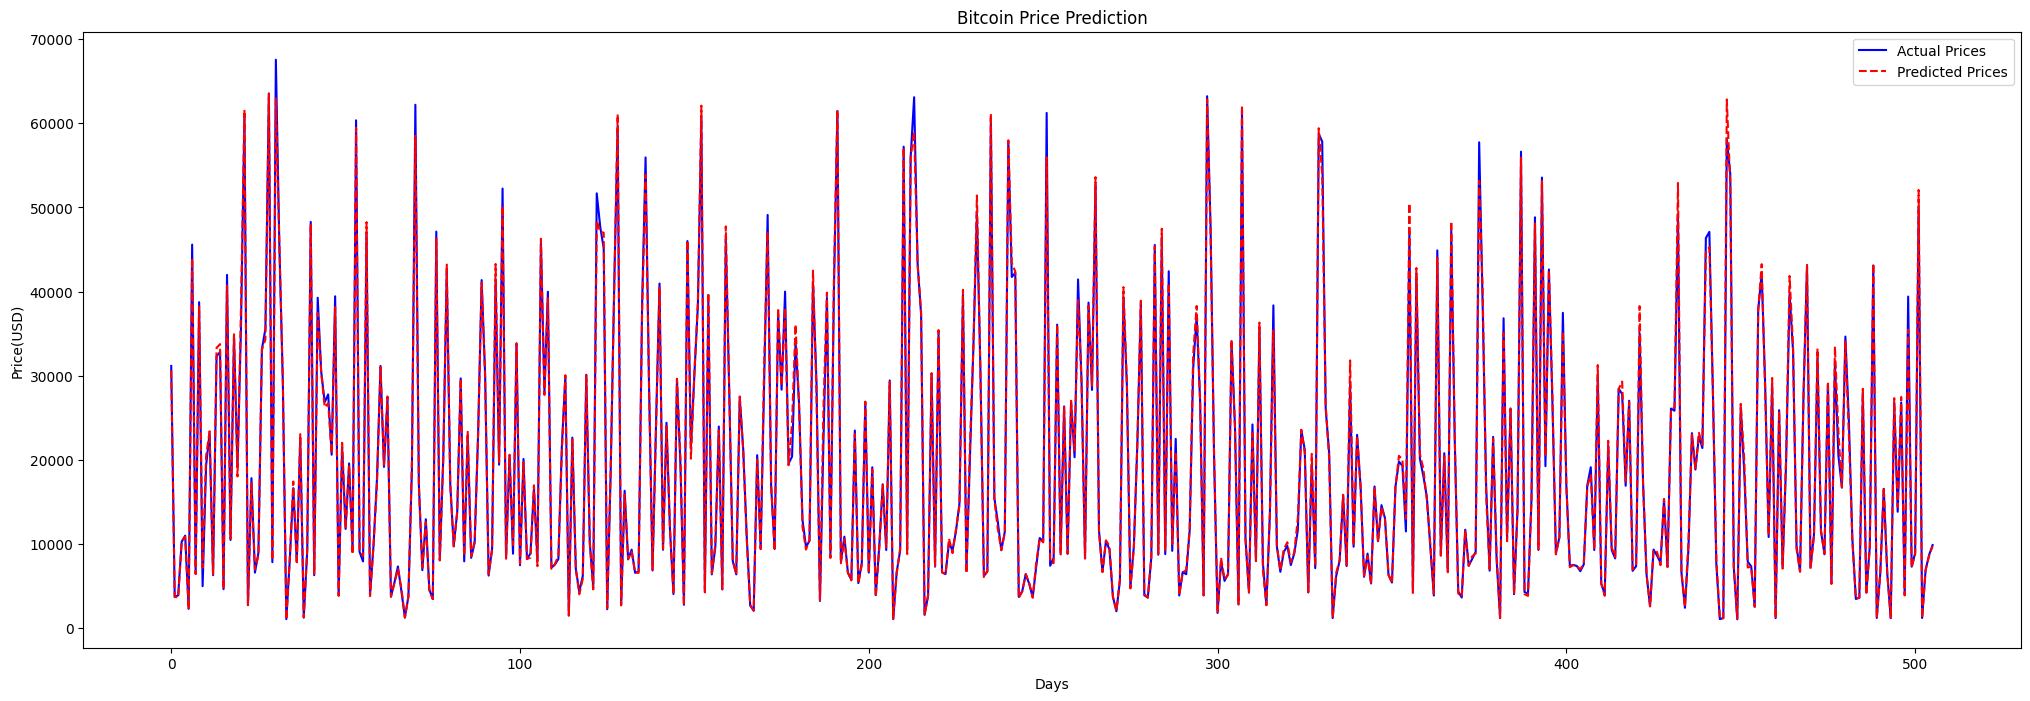

In [31]:
plt.figure(figsize=(25,8))
plt.plot(y_test.values,label='Actual Prices',color='blue')
plt.plot(y_pred,label='Predicted Prices',color='red',linestyle='--')
plt.title("Bitcoin Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price(USD)")
plt.legend()
plt.show()